## Goal:
### Explore the volcanic eruption dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between features.

### 2. Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [7]:
df = pd.read_csv(r'C:\Users\PanasaKamal\Data Analysis\Week_5_Assignment\csv_files\volcanic_erruption.csv')
df.head()

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [24]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (1508, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Number               1508 non-null   int64  
 1   Name                 1508 non-null   object 
 2   Country              1508 non-null   object 
 3   Region               1508 non-null   object 
 4   Type                 1508 non-null   object 
 5   Activity Evidence    1508 non-null   object 
 6   Last Known Eruption  1508 non-null   object 
 7   Latitude             1508 non-null   float64
 8   Longitude            1508 non-null   float64
 9   Elevation (Meters)   1508 non-null   int64  
 10  Dominant Rock Type   1455 non-null   object 
 11  Tectonic Setting     1501 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 141.5+ KB
None
Number                  0
Name                    0
Country                 0
Region                  0
Ty

### Insights:

1. The dataset contains 1,508 global records with a mix of categorical features (like Country and Tectonic Setting) and wide-ranging numerical features, including Elevation spanning from deep underwater (-4200m) to high peaks (6879m).

2. Data cleaning is necessary as several categorical features, especially Dominant Rock Type (missing 53 values) and Tectonic Setting (missing 7 values), have missing entries.

3. For future time-based analysis, the Last Known Eruption column must be converted from its current generic object type into a usable datetime format.

In [9]:
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

df['Type'] = df['Type'].fillna('Unknown')
df['Activity Evidence'] = df['Activity Evidence'].fillna('Unknown')


### Insights:

1. Filling missing values in Country and Region using the mode (most frequent value) is done to minimize distortion of the overall geographical distribution and retain all available records for analysis.

2. Imputing Type and Activity Evidence with the explicit label 'Unknown' is a robust strategy that treats missingness as its own distinct category, which prevents information loss if the absence of a value is itself a meaningful indicator of the volcano's status.

3. These cleaning steps collectively ensure that all categorical columns are complete, enabling smooth and accurate downstream analysis, such as grouping, counting, and correlation studies using these features.

In [11]:
avg_elevation = np.mean(df['Elevation (Meters)'])
print("Average Elevation (Meters):", avg_elevation)
 
median_latitude = np.median(df['Latitude'])
print("Median Latitude:", median_latitude)

avg_elevation_by_setting = df.groupby('Tectonic Setting')['Elevation (Meters)'].mean()
print("Average Elevation by Tectonic Setting:\n", avg_elevation_by_setting)

volcano_count_by_region = df.groupby('Region')['Number'].count()
print("Volcano Count by Region:\n", volcano_count_by_region)

Average Elevation (Meters): 1683.3574270557028
Median Latitude: 13.8615
Average Elevation by Tectonic Setting:
 Tectonic Setting
Intraplate / Continental Crust (>25 km)            1846.282051
Intraplate / Intermediate Crust (15-25 km)         1375.600000
Intraplate / Oceanic Crust (< 15 km)                927.645161
Rift Zone / Continental Crust (>25 km)             1787.412844
Rift Zone / Intermediate Crust (15-25 km)           858.604651
Rift Zone / Oceanic Crust (< 15 km)                 291.930693
Subduction Zone / Continental Crust (>25 km)       2317.236220
Subduction Zone / Crust Thickness Unknown           545.409639
Subduction Zone / Intermediate Crust (15-25 km)    1018.974359
Subduction Zone / Oceanic Crust (< 15 km)           449.946970
Unknown                                            1250.000000
Name: Elevation (Meters), dtype: float64
Volcano Count by Region:
 Region
Africa and Red Sea                131
Alaska                             88
Antarctica                  

### Insights:

1. The average elevation for all volcanoes provides a central measure of their height above sea level, while the median latitude identifies the dataset's general distribution (e.g., concentrated in the northern or southern hemisphere).

2. Grouping the average elevation by Tectonic Setting allows you to see if volcanoes in subduction zones are systematically higher or lower than those in rift valleys.

3. The volcano count by Region immediately identifies the geographical areas with the highest density of volcanic activity in your dataset.

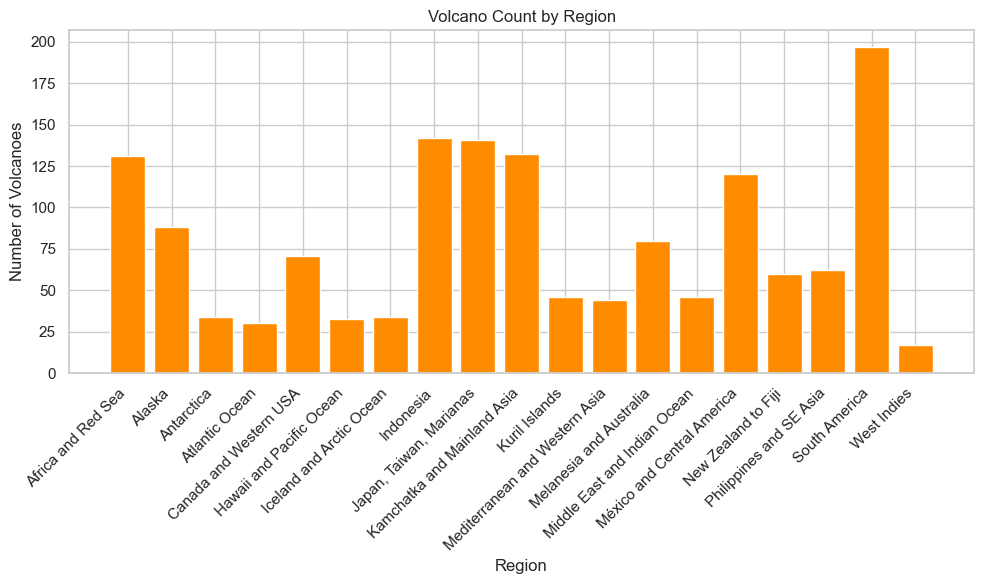

In [12]:
volcano_count_by_region = df.groupby('Region')['Number'].count()
regions = volcano_count_by_region.index
counts = volcano_count_by_region.values

plt.figure(figsize=(10, 6))
plt.bar(regions, counts, color='darkorange')
plt.title("Volcano Count by Region")
plt.xlabel("Region")
plt.ylabel("Number of Volcanoes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights:

1. This chart immediately identifies the most volcanically dense regions in the dataset (regions with the tallest bars), pointing to key geographical areas for further investigation.

2. It visually represents the results from the Volcano Count by Region analysis, showing the distribution of the dataset across its primary geographic segments.

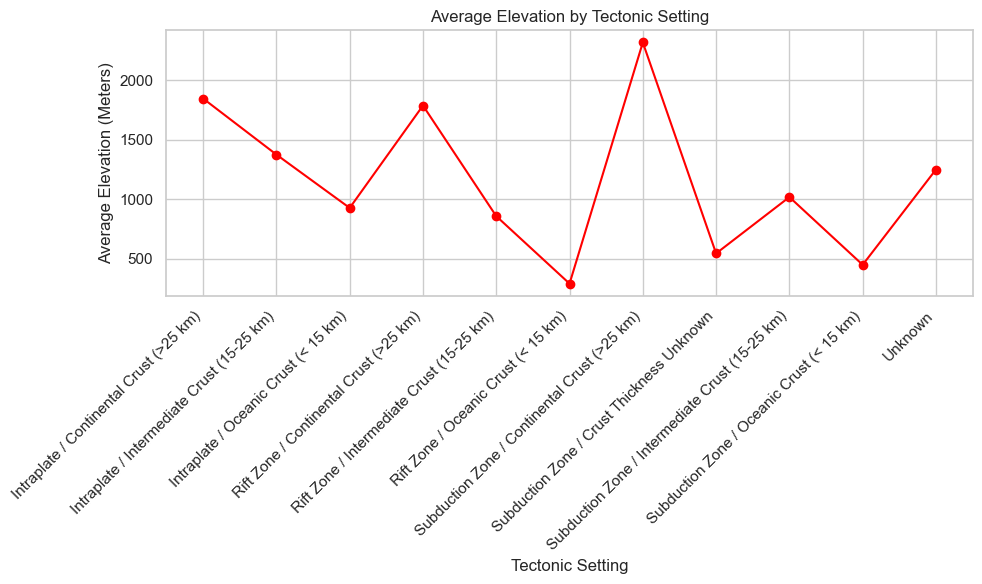

In [15]:
avg_elevation_by_setting = df.groupby('Tectonic Setting')['Elevation (Meters)'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_elevation_by_setting.index, avg_elevation_by_setting.values, marker='o', color='red')
plt.title("Average Elevation by Tectonic Setting")
plt.xlabel("Tectonic Setting")
plt.ylabel("Average Elevation (Meters)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Insights:

1. This plot allows for the immediate comparison of average volcano height across different geological environments (e.g., subduction, rift, hotspot).

2. The line chart effectively visualizes the magnitude of the elevation difference between the tectonic settings, helping to identify which geological context typically produces the highest or lowest volcanoes.

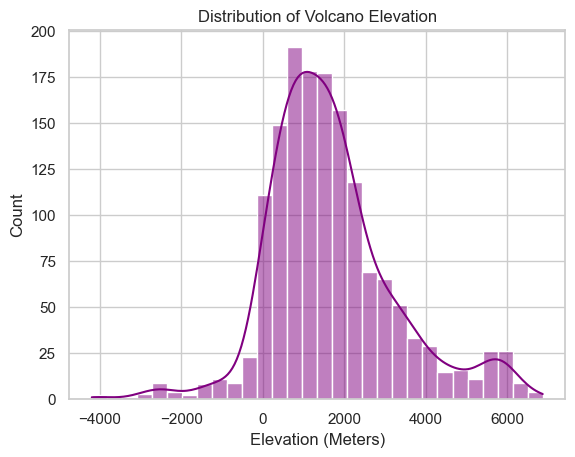

In [16]:
sns.histplot(df['Elevation (Meters)'], bins=30, kde=True, color='purple')
plt.title("Distribution of Volcano Elevation")
plt.xlabel("Elevation (Meters)")
plt.show()

### Insights:

1. This histogram will clearly show the central tendency of volcano heights (where the peak of the distribution lies) and the overall shape of the elevation data.

2. The visualization will highlight the skewness of the elevation data and how frequently low, mid-range, and extremely high (or low, in the case of negative values) elevations occur in the global sample.

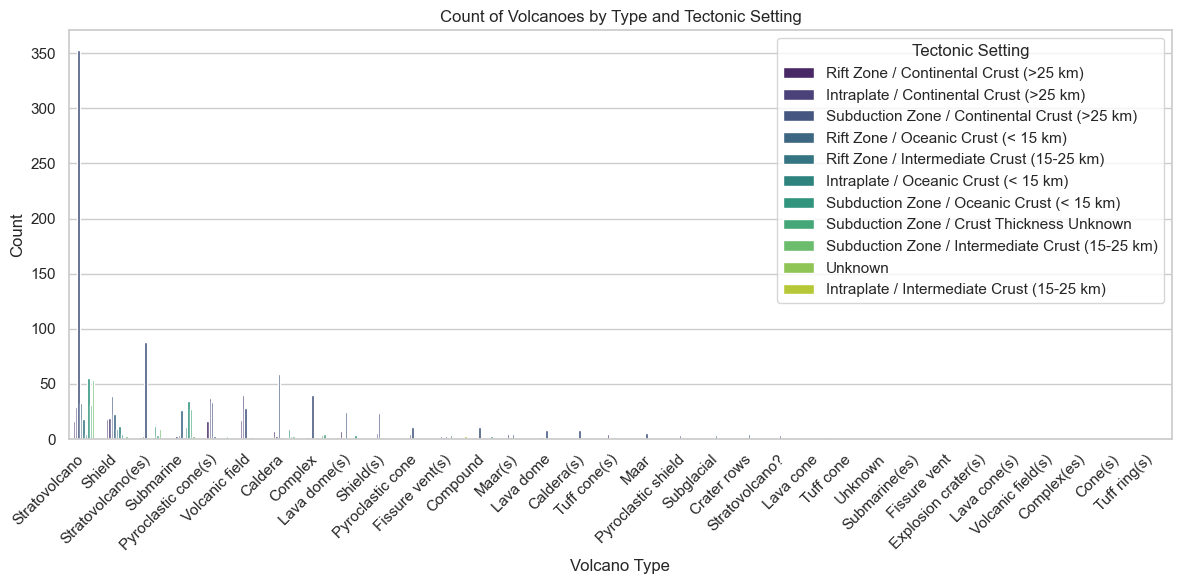

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Type', hue='Tectonic Setting', data=df, palette='viridis', order=df['Type'].value_counts().index)
plt.title("Count of Volcanoes by Type and Tectonic Setting")
plt.xlabel("Volcano Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights:
1. This chart immediately shows the most common types of volcanoes in the dataset (the tallest bars), such as stratovolcanoes or shield volcanoes.

2. Segmenting by Tectonic Setting helps identify where each volcano type predominantly occurs (e.g., are most shield volcanoes found in rift zones or on hotspots?).

3. The use of value_counts().index in the order parameter ensures the bars are sorted from most frequent to least frequent, making the distribution easy to interpret.

C:\Users\PanasaKamal\AppData\Local\Temp\ipykernel_20292\2488643911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dominant Rock Type', y='Elevation (Meters)', data=df, palette='Spectral')


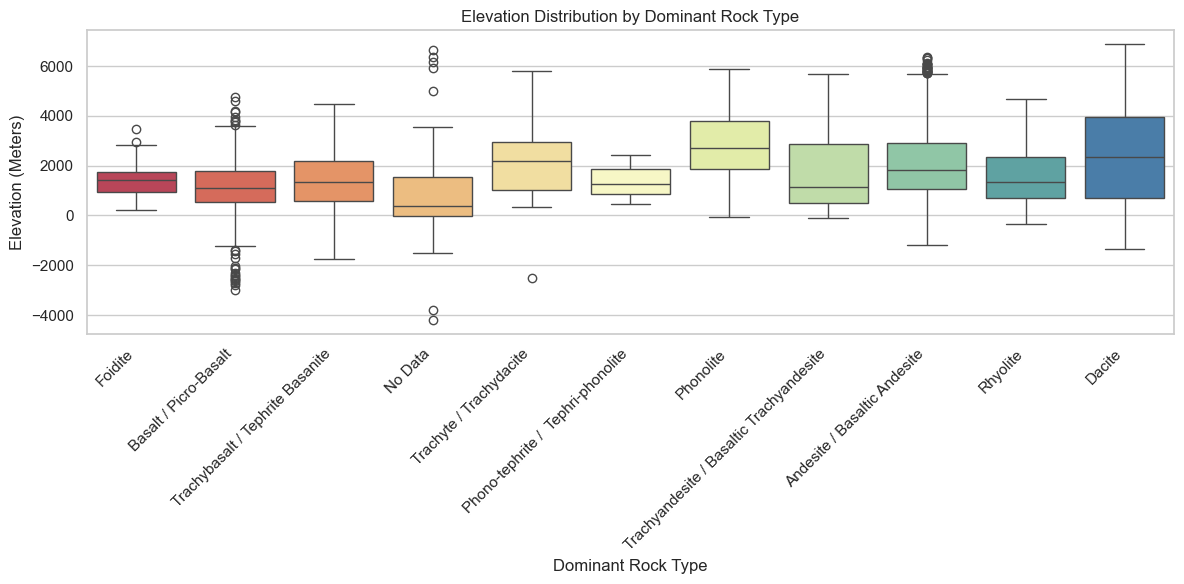

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dominant Rock Type', y='Elevation (Meters)', data=df, palette='Spectral')
plt.title("Elevation Distribution by Dominant Rock Type")
plt.xlabel("Dominant Rock Type")
plt.ylabel("Elevation (Meters)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insights:
1. This box plot will illustrate the typical elevation range and median height associated with volcanoes made of different rock types (e.g., Basaltic vs. Andesitic).

2. It will help identify outliers (volcanoes far outside the normal elevation range for their rock type) and determine which rock type is associated with the highest median elevation (highest box).

<Figure size 1000x1000 with 0 Axes>

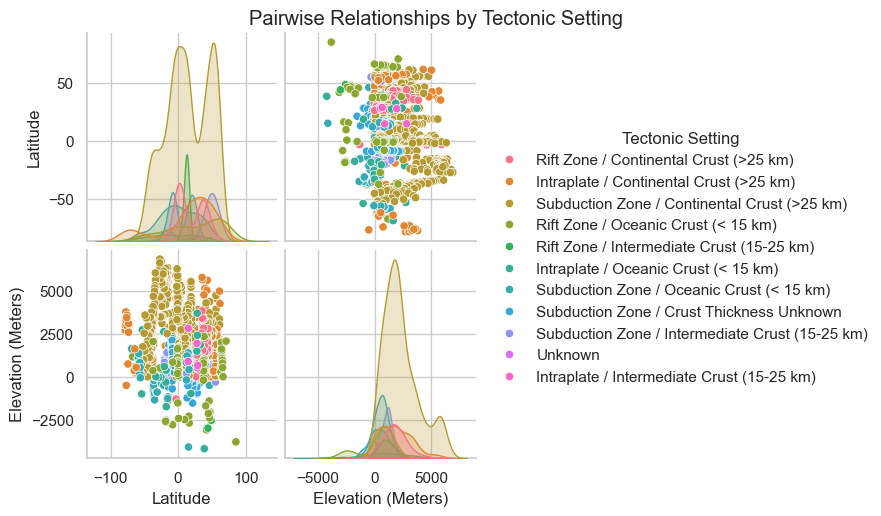

In [21]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, vars=['Latitude', 'Elevation (Meters)'], hue='Tectonic Setting', diag_kind='kde')
plt.suptitle("Pairwise Relationships by Tectonic Setting", y=1.02)
plt.show()

### Insights:

1. This pairplot provides a comprehensive view of the distributions (along the diagonals) and pairwise relationships (off the diagonals) among Latitude and Elevation.

2. Segmenting by Tectonic Setting helps reveal if specific geological environments cluster in distinct latitude or elevation ranges. For example, it might show that volcanoes associated with "Hotspot" settings tend to have a tighter clustering of latitudes or lower average elevations compared to "Subduction Zone" settings.

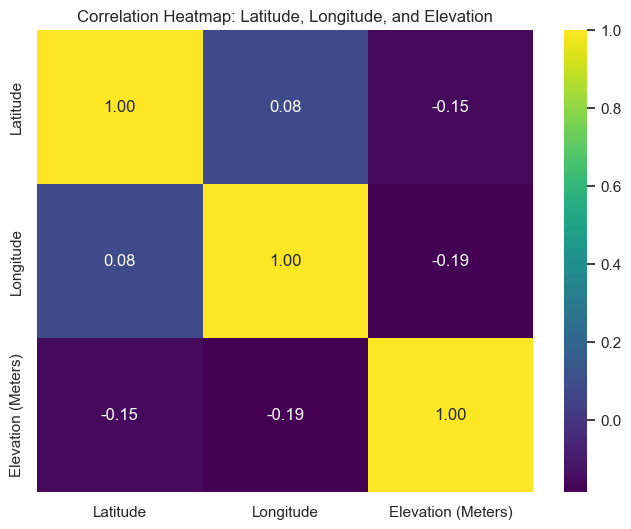

In [23]:
corr = df[['Latitude', 'Longitude', 'Elevation (Meters)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap: Latitude, Longitude, and Elevation")
plt.show()

### Insights:
1. This heatmap will visually display the linear relationship (or lack thereof) between the geographical coordinates and the volcano's height.

2. It will highlight if there's a strong correlation (near ±1) or a weak correlation (near 0) between pairs of features, such as whether Latitude is correlated with Elevation (i.e., are volcanoes near the equator systematically higher or lower than those near the poles?).